In [78]:
using ControlSystems
using Polynomials
using Plots

In [79]:
PlossT = 0.4;
n = 0.1;
Vin = 230 * sqrt(2);
Pout = 100;
Vout = 5
fs = 2500;
k = 0.03;
Rp = 0.001;
Rs = 0.0001;
D0 = roots(Polynomial([Vout^3 / Pout, Rs * Vout - (n * Vin + 2 * Vout) * Vout^2 / Pout, (n * Vin + Vout) * Vout^2 / Pout + (n^2 * Rp - Rs) * Vout]))[1]
Rl = 0.25;
Req = D0 * Rp + (1 - D0) / n^2 * Rs;
Lm = 5e-3;
Cf = 10e-3;

In [80]:
A = [(-D0*Req/Lm) (-(1 - D0)/(n*Lm)); (1-D0)/(n*Cf) (-1/(Rl*Cf))]

2×2 Matrix{Float64}:
  -0.234532  -1733.51
 866.755      -400.0

In [81]:
B = [(D0/Lm) ((1-D0)*Rl*Vin)/(Lm*((1-D0)^2*Rl+n^2*D0*Req)); 0 (-(n * D0 * Vin)/(Cf*(1-D0)^2*Rl+n^2*D0*Req))]

2×2 Matrix{Float64}:
 26.649  75049.8
  0.0    -2293.28

In [82]:
C = [0 1]

1×2 Matrix{Int64}:
 0  1

In [83]:
D = [0 0]

1×2 Matrix{Int64}:
 0  0

In [84]:
sys = ss(A, B, C, D)

StateSpace{Continuous, Float64}
A = 
  -0.2345322727557256  -1733.5101489152457
 866.7550744576229      -400.0
B = 
 26.648985108475415  75049.7623777771
  0.0                -2293.2825010708607
C = 
 0.0  1.0
D = 
 0.0  0.0

Continuous-time state-space model

In [85]:
G = tf(sys)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
Input 1 to output 1
               23098.143071916886
-------------------------------------------------
1.0s^2 + 400.2345322727557s + 1.502622531105181e6

Input 2 to output 1
   -2293.2825010708607s + 6.5049224529020034e7
-------------------------------------------------
1.0s^2 + 400.2345322727557s + 1.502622531105181e6

Continuous-time transfer function model

In [86]:
GDV = G[1, 2]

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
   -2293.2825010708607s + 6.5049224529020034e7
-------------------------------------------------
1.0s^2 + 400.2345322727557s + 1.502622531105181e6

Continuous-time transfer function model

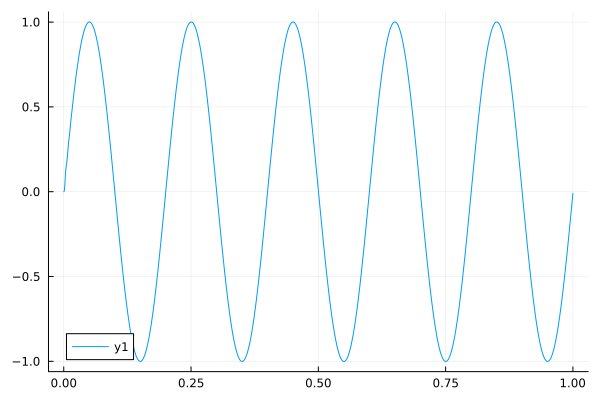

In [90]:
t = 0:0.00005:1;
u1 = 0.2 * Vin * sin.(2 * pi * 5 * t');
u2 = zeros(1, length(t));
u = [u1; u2];

y, _ = lsim(sys, u, t);
plot(t, y')